In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from operator import itemgetter

In [2]:
edges = pd.read_csv('Datasets/edges.csv')
nodes = pd.read_csv('Datasets/nodes.csv')

In [3]:
nodes.head()

Unnamed: 0  User_ID            User                   Country
0           0        1  Mark Hernandez  United States of America
1           1        2    Oliver Jones  United States of America
2           2        3     Niam Taylor  United States of America
3           3        4    Oliver Lopez  United States of America
4           4        5     Mary Miller  United States of America

In [4]:
edges.head()

Unnamed: 0  User_1  User_2
0           0       6      44
1           1      49       6
2           2      15       4
3           3      61      67
4           4      31      17

In [5]:
del edges[edges.columns[0]]
del nodes[nodes.columns[0]]

In [6]:
G = nx.Graph()
G.add_edges_from(np.array(edges))

In [7]:
options = {
    "font_size": 10,
    "node_size": 500,
    "node_color": "#00A0DC",
    "edgecolors": "black",
    "linewidths": 0.7,
    "width": 0.35,
}

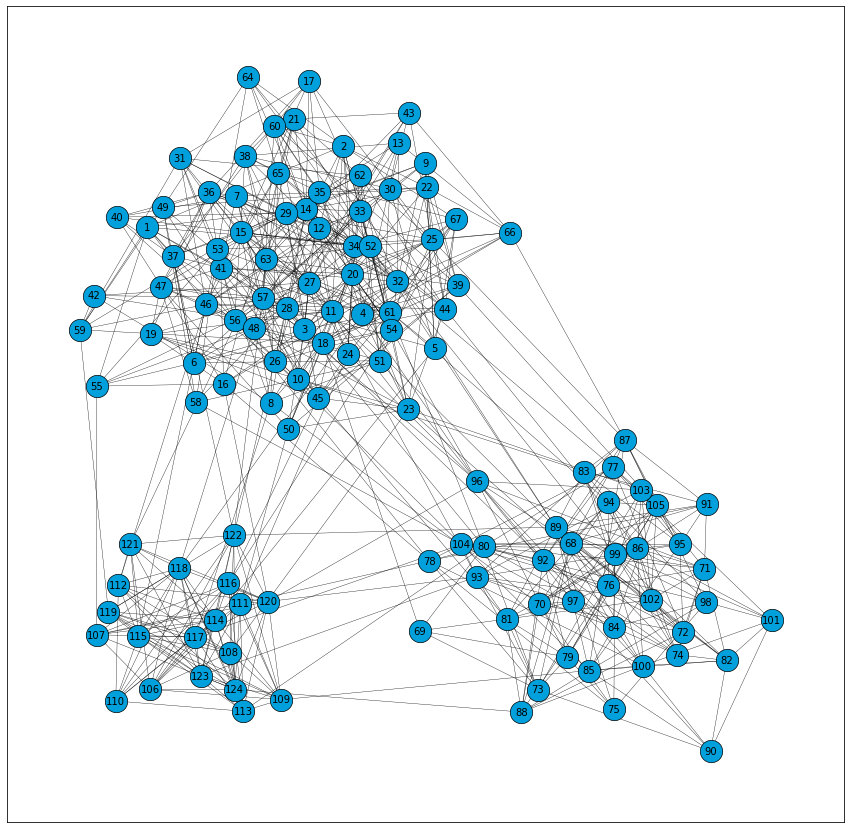

In [8]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, **options, pos = nx.spring_layout(G, seed=1111))
plt.show()

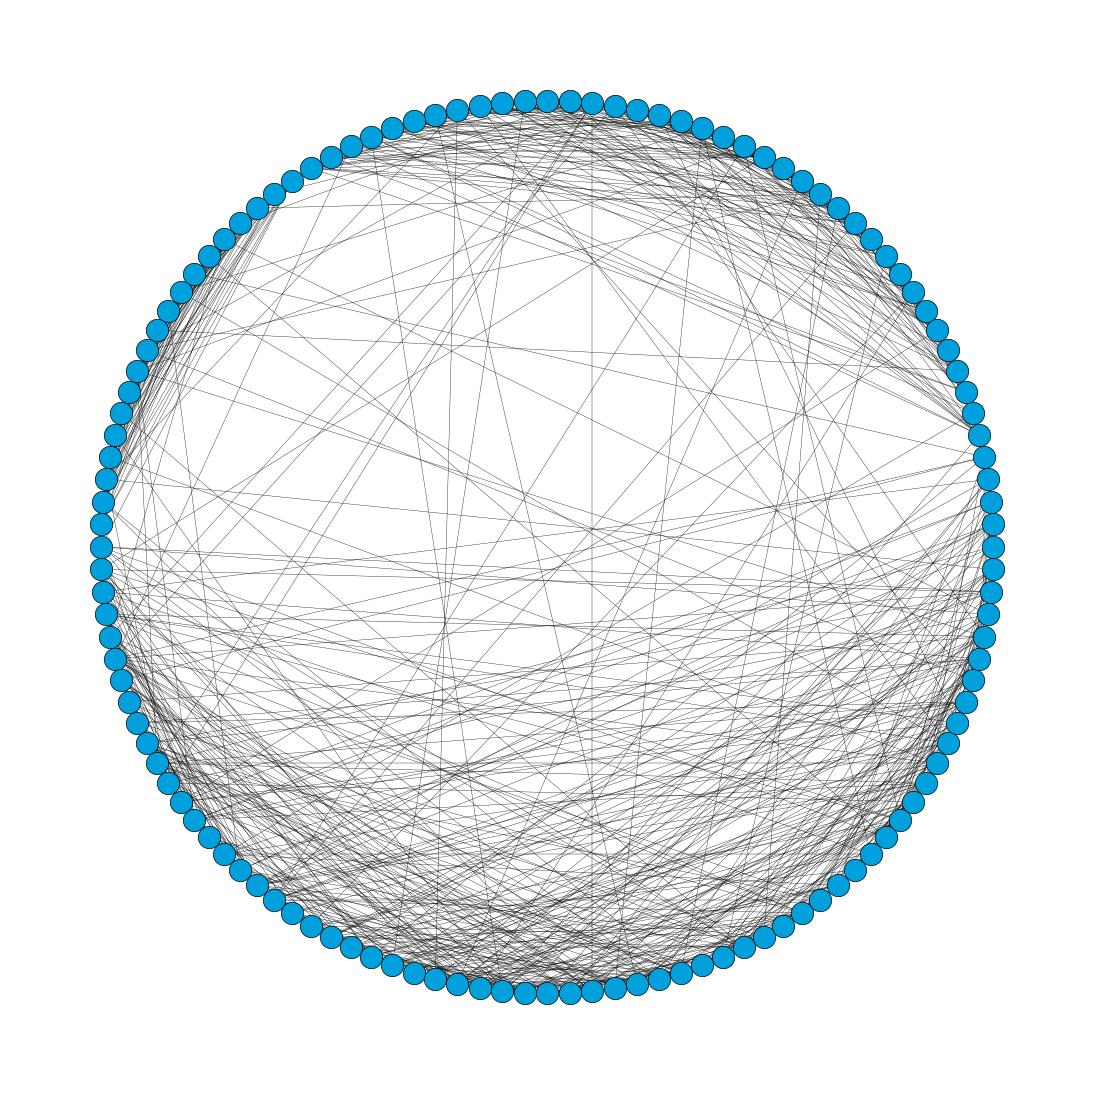

In [9]:
plt.figure(figsize=(15, 15))
nx.draw_shell(G, **options)
plt.show()

## Coloring nodes by countries

In [10]:
# setting User_ID as index in nodes df, and
# reindexing nodes the nodes by the nodes of G
nodes = nodes.set_index('User_ID')
cat = nodes.reindex(G.nodes())

In [11]:
# making Country as category
cat['Country'] = pd.Categorical(cat['Country'])
cat['Country'].cat.codes

User_ID
6      2
44     2
49     2
15     2
4      2
      ..
108    1
121    1
111    1
116    1
110    1
Length: 124, dtype: int8

In [12]:
# creating a colormap
cmap = col.ListedColormap(['C0', 'darkorange', 'green'])

#### Green is USA, Darkorange is Russia, and Blue is Armenia

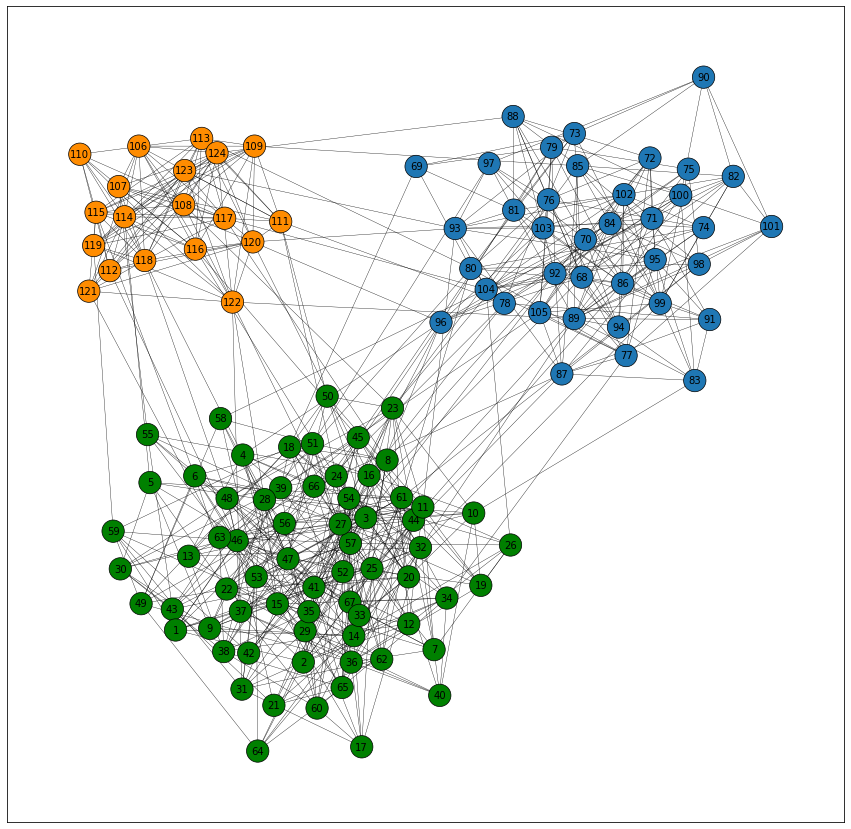

In [13]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, with_labels=True, node_color=cat['Country'].cat.codes, cmap=cmap, font_size = 10,
    node_size = 500,
    edgecolors = "black",
    linewidths = 0.7,
    width = 0.35) 
plt.show()

### Coloring by degree of each node

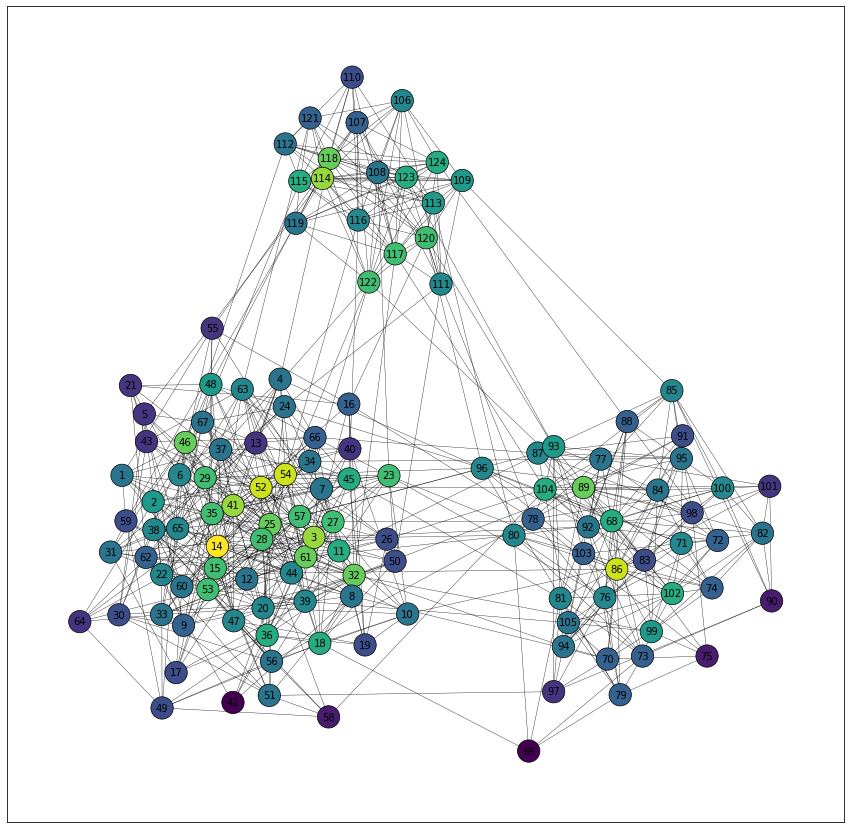

In [14]:
node_color = [G.degree(v) for v in G]
options2 = {
    "font_size": 10,
    "node_size": 500,
    "edgecolors": "black",
    "linewidths": 0.7,
    "width": 0.35,
}

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, with_labels=True, node_color=node_color, **options2)
plt.show()

In [15]:
def subgraph_bycountry(nodes, edges, country):
    nodes_country = np.array(nodes.loc[nodes.Country == country].index)
    edges_country = edges.loc[edges['User_1'].isin(nodes_country)].loc[edges['User_2'].isin(nodes_country)]

    G = nx.Graph()
    G.add_edges_from(np.array(edges_country))
    return G

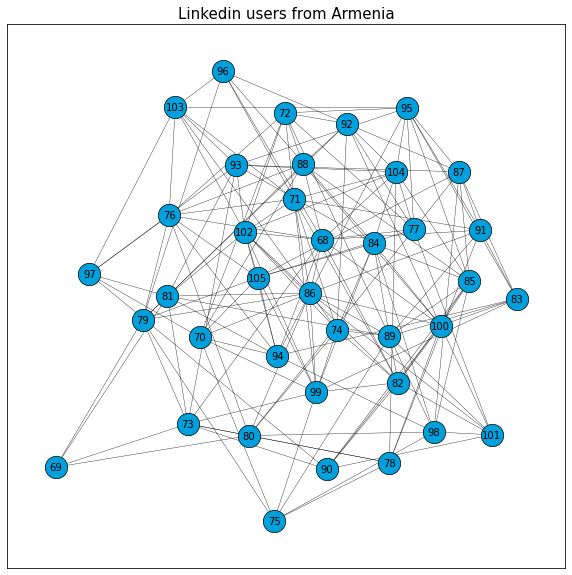

In [16]:
G_arm = subgraph_bycountry(nodes, edges, 'Armenia')

plt.figure(figsize=(10, 10))
nx.draw_networkx(G_arm, **options)
plt.title('Linkedin users from Armenia', size = 15)
plt.show()

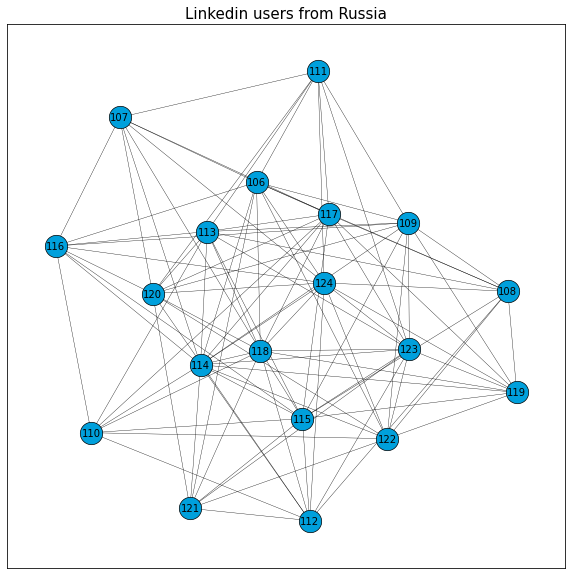

In [17]:
G_rus = subgraph_bycountry(nodes, edges, 'Russia')

plt.figure(figsize=(10, 10))
nx.draw_networkx(G_rus, **options)
plt.title('Linkedin users from Russia', size = 15)
plt.show()

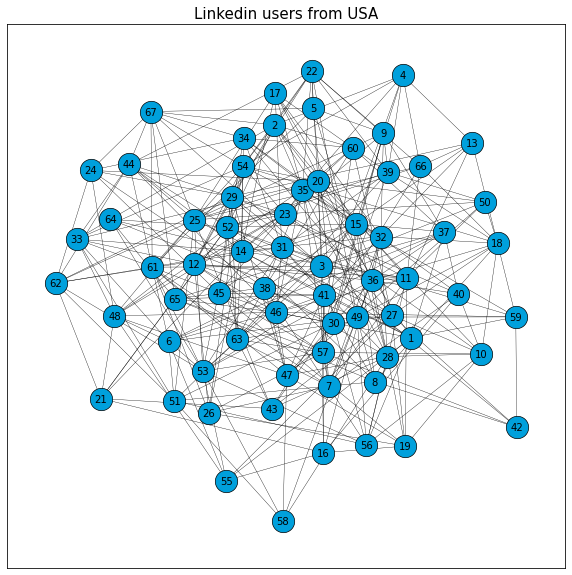

In [18]:
G_usa = subgraph_bycountry(nodes, edges, 'United States of America')

plt.figure(figsize=(10, 10))
nx.draw_networkx(G_usa, **options)
plt.title('Linkedin users from USA', size = 15)
plt.show()

In [19]:
# average local clustering coefficient over all nodes for Armenians
nx.average_clustering(G_arm)

0.24569151608625295

In [20]:
# measuring the transitivity: ratio of number of triangles
# over the number open triads
nx.transitivity(G_arm)

0.24229979466119098

In [21]:
# average distance between every pair of node
nx.average_shortest_path_length(G_arm)

1.8321479374110954

In [22]:
# maximum distance between any pair of node
nx.diameter(G_arm)

3

In [23]:
# eccentricity(largest distance betwen a node from other nodes) of nodes
nx.eccentricity(G_arm)

{76: 3,
 97: 3,
 82: 3,
 85: 3,
 101: 3,
 77: 3,
 95: 3,
 87: 3,
 90: 3,
 83: 3,
 100: 3,
 99: 2,
 81: 3,
 93: 3,
 92: 3,
 79: 3,
 86: 2,
 89: 2,
 75: 3,
 104: 3,
 71: 3,
 68: 3,
 73: 3,
 80: 3,
 96: 3,
 88: 2,
 72: 3,
 105: 3,
 98: 3,
 70: 3,
 78: 3,
 69: 3,
 84: 3,
 91: 3,
 103: 3,
 94: 3,
 74: 3,
 102: 2}

In [24]:
# radius of a graph
nx.radius(G_arm)

2

In [25]:
# nodes that have eccentricity equal to the diameter
nx.periphery(G_arm)

[76,
 97,
 82,
 85,
 101,
 77,
 95,
 87,
 90,
 83,
 100,
 81,
 93,
 92,
 79,
 75,
 104,
 71,
 68,
 73,
 80,
 96,
 72,
 105,
 98,
 70,
 78,
 69,
 84,
 91,
 103,
 94,
 74]

In [26]:
# nodes that have eccentricity equal to the radius
nx.center(G_arm)

[99, 86, 89, 88, 102]

In [27]:
# checking if the graph is connected
nx.is_connected(G_arm)

True

In [28]:
# minimum number of nodes that can be removed to make it disconnected
nx.node_connectivity(G_arm)

4

In [29]:
# finding that nodes
nx.minimum_node_cut(G_arm)

{73, 79, 80, 81}

### Degree Centrality

In [30]:
degree_centrality = nx.degree_centrality(G) 
highest_degree_centrality_node = max(G.nodes, key=degree_centrality.get)
dc=degree_centrality[highest_degree_centrality_node]
print("Node: {} {}Degree Centrality: {}".format(highest_degree_centrality_node,'\n',dc))

Node: 14 
Degree Centrality: 0.14634146341463417


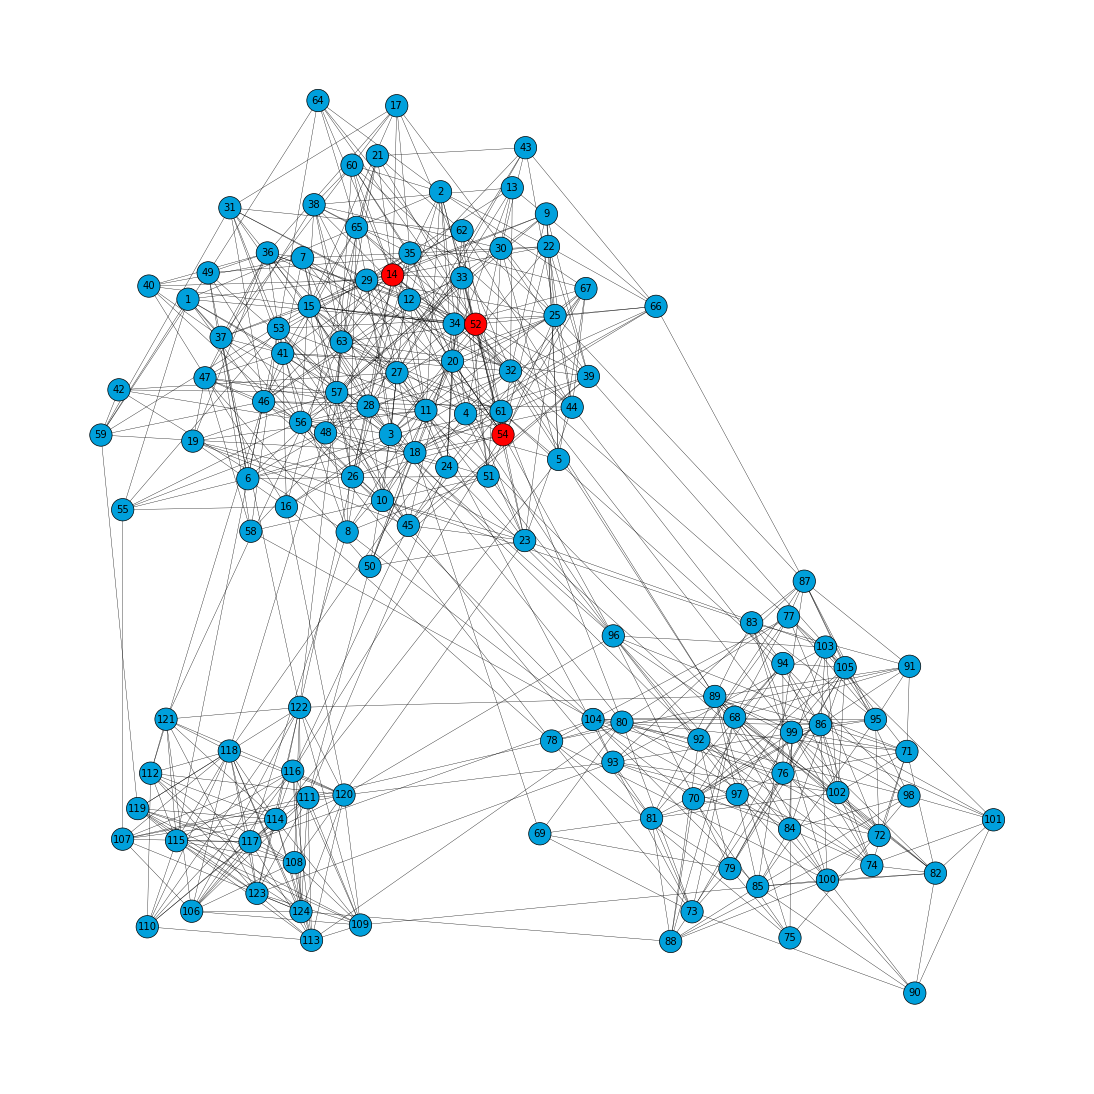

In [31]:
# Drawing Hubs
 
nx.set_node_attributes(G, degree_centrality, 'degree')
sorted_degree = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)
highest_degree_dict = dict(sorted_degree[:3])
color_map_degree = ['red' if node in highest_degree_dict.keys() else "#00A0DC" for node in G]

plt.figure(figsize=(15, 15))
nx.draw(G,node_color=color_map_degree, with_labels=True, **options2, pos = nx.spring_layout(G, seed=1111)) 
plt.show()

# Nodes in red are the users with highest degree centrality

### Betweenness Centrality

In [32]:
betweenness = nx.betweenness_centrality(G) 
highest_betweenness_node = max(G.nodes, key=betweenness.get)
b=betweenness[highest_betweenness_node]
print("Node: {} {}Betweenness Centrality: {}".format(highest_betweenness_node,'\n',b))

Node: 89 
Betweenness Centrality: 0.051455257793285566


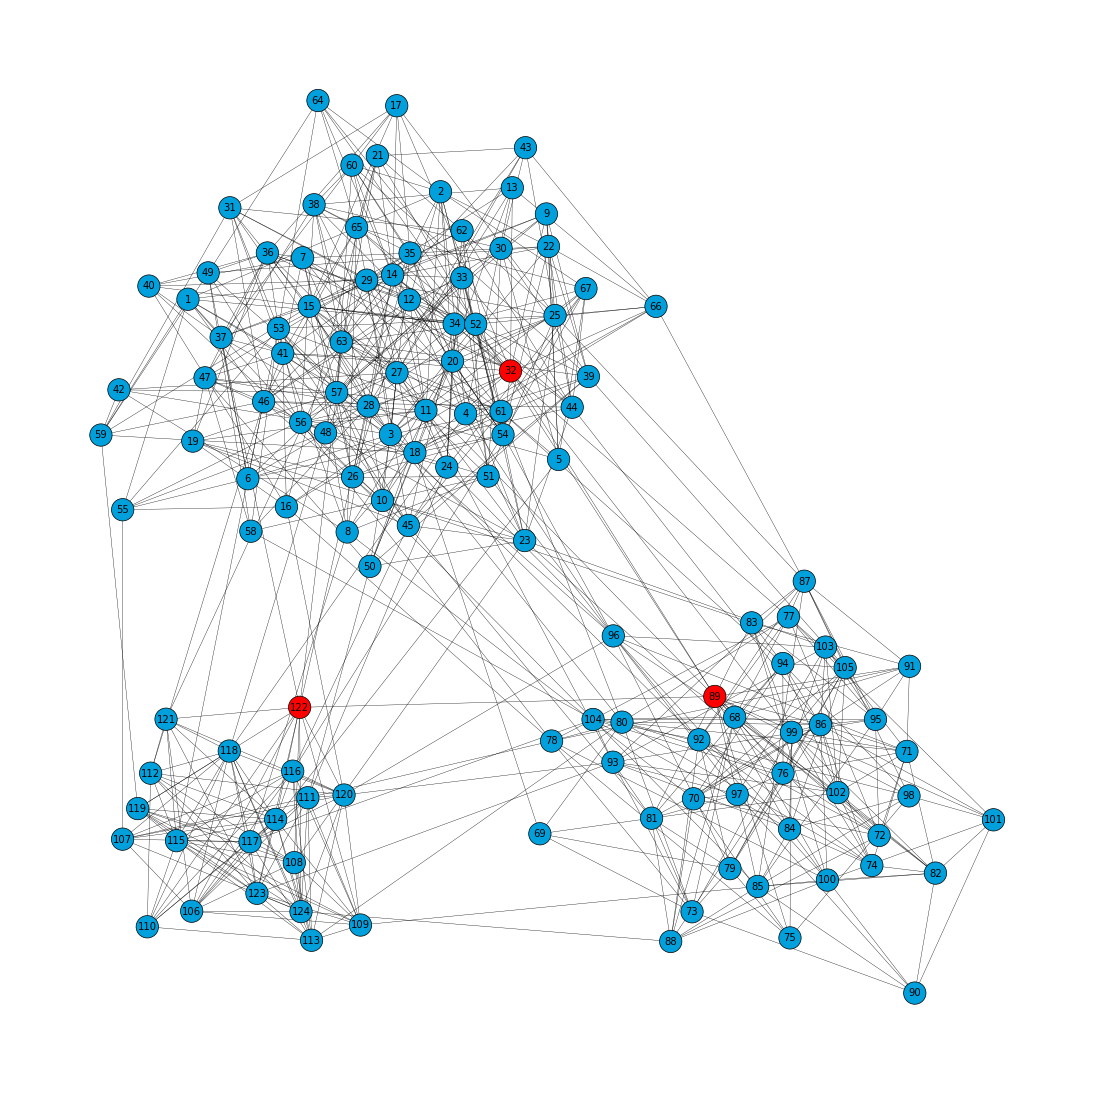

In [33]:
nx.set_node_attributes(G, betweenness, 'betweenness') 
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)
highest_betweenness_dict = dict(sorted_betweenness[:3])
color_map = ['red' if node in highest_betweenness_dict.keys() else "#00A0DC" for node in G]

plt.figure(figsize=(15, 15))
nx.draw(G,node_color=color_map, with_labels=True, **options2, pos = nx.spring_layout(G, seed=1111)) 
plt.show()

# Nodes in red are the users with highest betweenness centrality

### Closeness Centrality

In [34]:
closeness = nx.closeness_centrality(G) 
highest_closeness_node = max(G.nodes, key=closeness.get)
c=closeness[highest_closeness_node]
print("Node: {} {}Closeness Centrality: {}".format(highest_closeness_node, '\n', c))

Node: 52 
Closeness Centrality: 0.4659090909090909


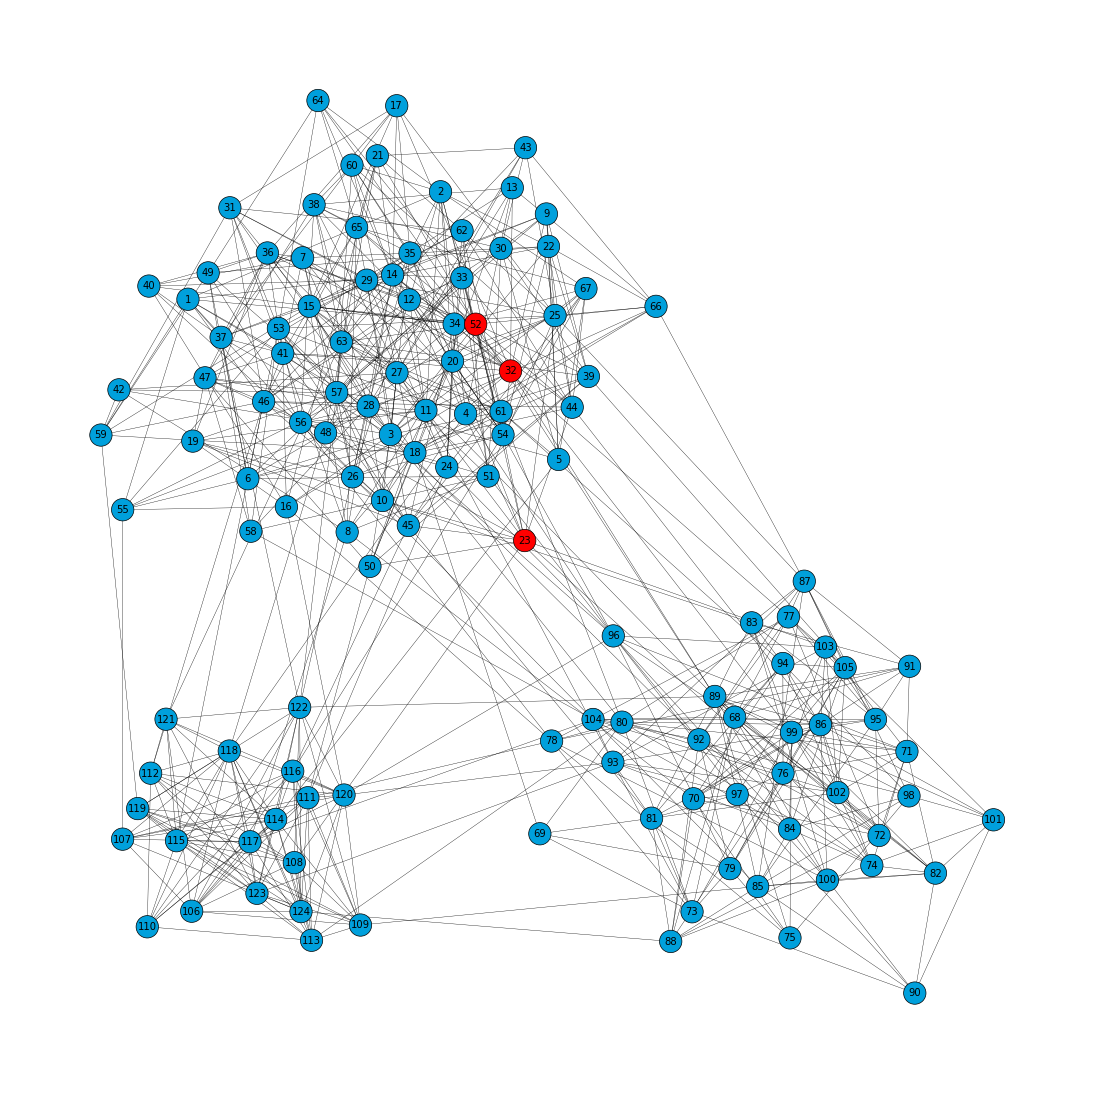

In [35]:
nx.set_node_attributes(G, closeness, 'closeness') 
sorted_closeness = sorted(closeness.items(), key=itemgetter(1), reverse=True)
highest_closeness_dict = dict(sorted_closeness[:3])
color_map_closeness = ['red' if node in highest_closeness_dict.keys() else "#00A0DC" for node in G]

plt.figure(figsize=(15, 15))
nx.draw(G,node_color=color_map_closeness, with_labels=True, **options2, pos = nx.spring_layout(G, seed=1111)) 
plt.show()

# Nodes in red are the users with highest closeness centrality

### Eigenvector Centrality

In [36]:
eigenvector = nx.eigenvector_centrality(G) 
highest_eigenvector_node = max(G.nodes, key=eigenvector.get)
e = eigenvector[highest_eigenvector_node]
print("Node: {} {}Eigan Vector Centrality: {}".format(highest_eigenvector_node, '\n', e))

Node: 114 
Eigan Vector Centrality: 0.16345084240523627


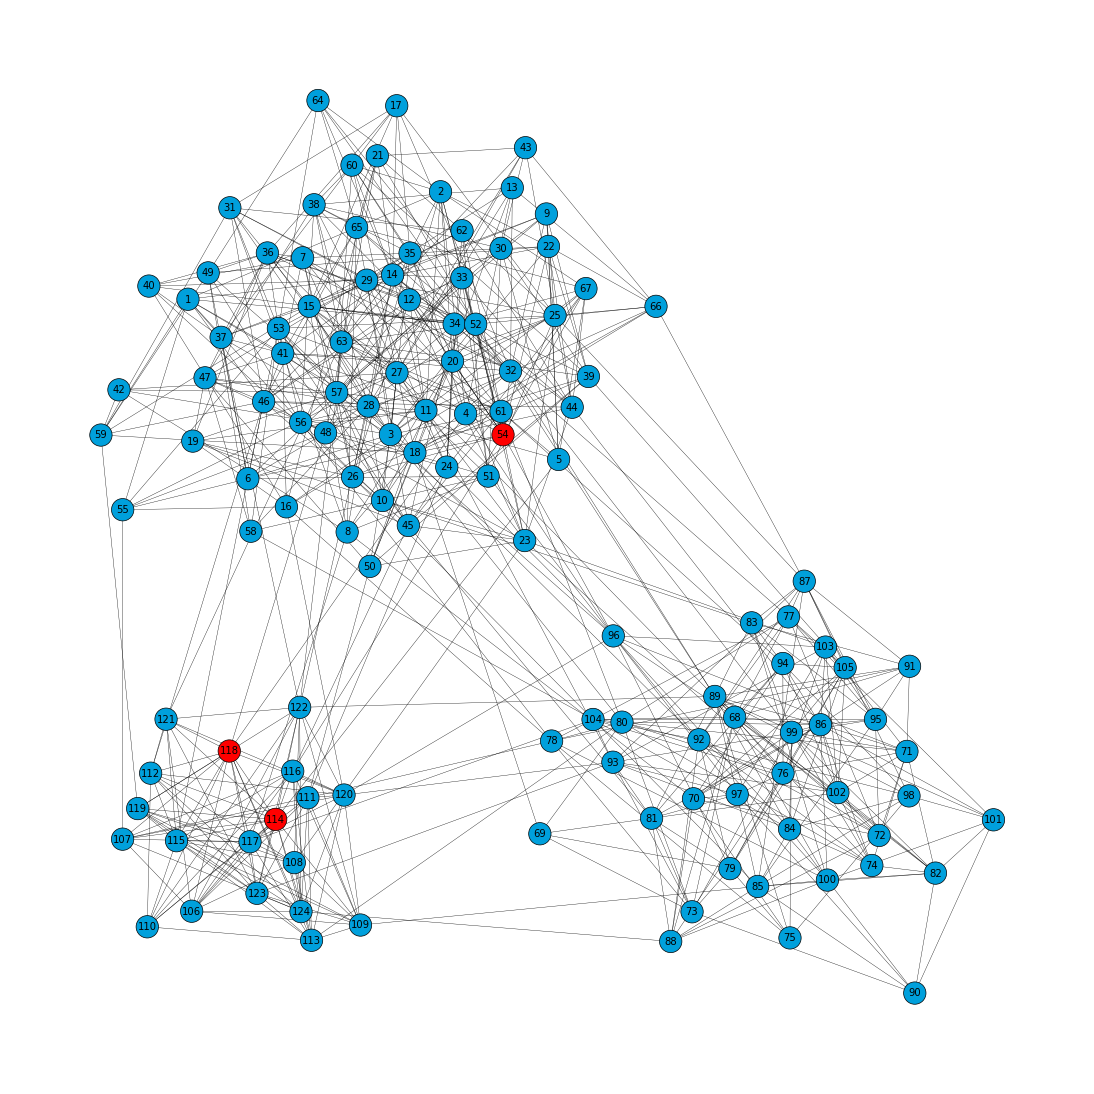

In [37]:
nx.set_node_attributes(G, eigenvector, 'eigen')
sorted_eigen = sorted(eigenvector.items(), key=itemgetter(1), reverse=True) 
highest_eigenvector_dict = dict(sorted_eigen[:3])
color_map_eigen = ['red' if node in highest_eigenvector_dict.keys() else "#00A0DC" for node in G]

plt.figure(figsize=(15, 15))
nx.draw(G,node_color=color_map_eigen, with_labels=True, **options2, pos = nx.spring_layout(G, seed=1111))
plt.show()

# Nodes in red are the users with highest eigenvector centrality